Lung histopathology

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
#from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_set= '/content/drive/MyDrive/lung_image_sets'

In [ ]:
for i,d in enumerate([image_set]):
    filepaths=[]
    labels=[]
    classlist=os.listdir(d)
    for klass in classlist:
        classpath=os.path.join(d,klass)
        if os.path.isdir(classpath):
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)
    Fseries= pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    lung_df=pd.concat([Fseries, Lseries], axis=1)
df=pd.concat([lung_df], axis =0).reset_index(drop=True)# make a combined dataframe

print(df['labels'].value_counts())

lung_aca    5010
lung_scc    5000
lung_n      5000
Name: labels, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_split=.5
test_split=.25
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), ' _test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  7505  _test_df length:  3752   valid_df length:  3753


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
height=224
width=224
channels=3
batch_size=32
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
gen=ImageDataGenerator(preprocessing_function=scalar)
train_set=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_set=gen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
validate_set=gen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
#classes=list(train_gen.class_indices.keys())
#class_count=len(classes)

test batch size:  67   test steps:  56
Found 7505 validated image filenames belonging to 3 classes.
Found 3752 validated image filenames belonging to 3 classes.
Found 3753 validated image filenames belonging to 3 classes.


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from  tensorflow import keras

In [ ]:
# import os                       # for working with files
# import numpy as np              # for numerical computationss
# import pandas as pd             # for working with dataframes
# import seaborn as sns
# import torch                    # Pytorch module
# import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
# import torch.nn as nn           # for creating  neural networks
# from torch.utils.data import DataLoader # for dataloaders
# from PIL import Image           # for checking images
# import torch.nn.functional as F # for functions for calculating loss
# import torchvision.transforms as transforms   # for transforming images into tensors
# from torchvision.utils import make_grid       # for data checking
# from torchvision.datasets import ImageFolder  # for working with classes and images
# from torchsummary import summary              # for getting the summary of our model
# import tensorflow as ts
# from  tensorflow import keras
# import itertools
# from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# %matplotlib inline

In [ ]:
# model_1 = keras.models.Sequential()

# model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

# model_1.add(keras.layers.Dropout(0.1))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
# model_1.add(keras.layers.Dropout(0.15))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
# model_1.add(keras.layers.Dropout(0.2))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Flatten())
# model_1.add(keras.layers.Dense(256, activation='relu'))
# model_1.add(keras.layers.Dense(3, activation='softmax'))

# model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# model_1.summary()

In [ ]:
MobileNet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# model_1 = keras.models.Sequential()

# model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

# model_1.add(keras.layers.Dropout(0.1))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
# model_1.add(keras.layers.Dropout(0.15))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
# model_1.add(keras.layers.Dropout(0.2))
# model_1.add(keras.layers.MaxPooling2D())

# model_1.add(keras.layers.Flatten())
# model_1.add(keras.layers.Dense(256, activation='relu'))
# model_1.add(keras.layers.Dense(3, activation='softmax'))

# model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
# model_1.summary()

In [ ]:
# don't train existing weights
for layer in MobileNet.layers:
    layer.trainable = False

In [ ]:
flatten = Flatten()(MobileNet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [ ]:
#creating a model
model_1 = Model(inputs = MobileNet.input, outputs = prediction )

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
# COMPILING THE MODEL

model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#executing the model
history = model_1.fit(train_set, validation_data = (validate_set), epochs = 50, verbose = 1)

Epoch 1/50
235/235 [==============================] - 2084s 9s/step - loss: 0.5414 - accuracy: 0.9306 - val_loss: 0.0909 - val_accuracy: 0.9680
Epoch 2/50
235/235 [==============================] - 59s 250ms/step - loss: 0.0296 - accuracy: 0.9895 - val_loss: 0.0813 - val_accuracy: 0.9771
Epoch 3/50
235/235 [==============================] - 60s 254ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.0817 - val_accuracy: 0.9779
Epoch 4/50
235/235 [==============================] - 60s 256ms/step - loss: 4.5472e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9811
Epoch 5/50
235/235 [==============================] - 59s 253ms/step - loss: 1.1859e-04 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9805
Epoch 6/50
235/235 [==============================] - 62s 263ms/step - loss: 8.3046e-05 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9819
Epoch 7/50
235/235 [==============================] - 62s 265ms/step - loss: 6.2393e-05 - accuracy: 1.0000 - val_loss: 

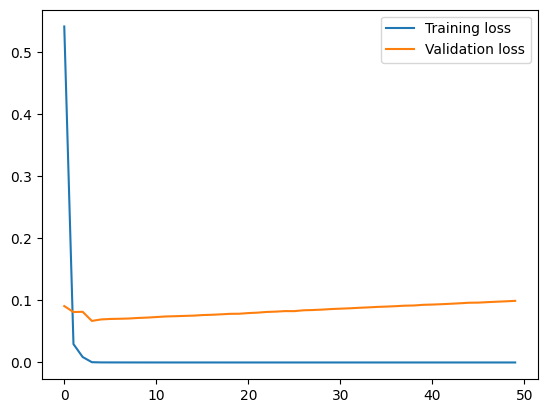

In [ ]:
# plotting the loss
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
#plt.title('loss')
plt.legend()
plt.show()

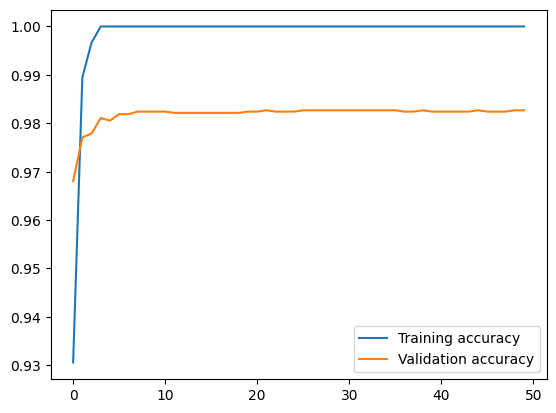

In [ ]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
#plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
# CHECKING THE CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model_1.predict(test_set)
y_pred = np.argmax(Y_pred ,axis =1)


56/56 [==============================] - 635s 12s/step


In [ ]:
preds = model_1.predict(test_set,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

56/56 [==============================] - 20s 358ms/step


<Axes: >

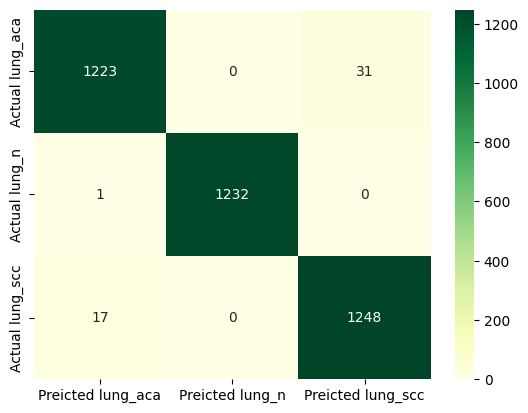

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix( y_true= test_set.classes, y_pred= y_pred, labels=[0, 1,2]), index=['Actual lung_aca','Actual lung_n','Actual lung_scc'],columns=['Preicted lung_aca','Preicted lung_n','Preicted lung_scc'])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGn")

In [ ]:
print('Classification Report')
target_names = ['lung_aca','lung_n','lung_scc']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    lung_aca       0.99      0.98      0.98      1254
      lung_n       1.00      1.00      1.00      1233
    lung_scc       0.98      0.99      0.98      1265

    accuracy                           0.99      3752
   macro avg       0.99      0.99      0.99      3752
weighted avg       0.99      0.99      0.99      3752



In [ ]:
loss, acc = model_1.evaluate_generator(test_set, len(test_set))

print ("\n\n================================\n\n")
print ("Loss: {}".format(loss))
print ("Accuracy: {0:.2f} %".format(acc * 100))
print ("\n\n================================\n\n")

test_set.reset()

<ipython-input-27-0bfbb599d6c5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model_1.evaluate_generator(test_set, len(test_set))






Loss: 0.06800027191638947
Accuracy: 98.69 %






In [ ]:
result = model_1.evaluate(test_set,batch_size=128)
print("test_loss, test accuracy",result)

56/56 [==============================] - 22s 390ms/step - loss: 0.0680 - accuracy: 0.9869
test_loss, test accuracy [0.06800027191638947, 0.986940324306488]


In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Y_pred = model.predict_generator(validation_generator, nb_validation_samples //
#batch_size+1)
y_pred = np.argmax(preds, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Confusion Matrix
[[1223    0   31]
 [   1 1232    0]
 [  17    0 1248]]
